# Regression - Linear and multiple

importing libraries and the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')
advertising = pd.read_csv('Downloads/Advertising.csv', usecols=[1,2,3,4])
advertising.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


/home/ccoew/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


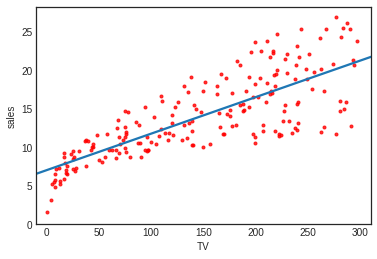

In [2]:
import seaborn as sns
sns.regplot(advertising.TV, advertising.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0);

# TV

linear regression for TV only with evauation of coefficient and std error in regression. Evaluation of r2 as metric to verify. 

In [3]:
import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression()
X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)

y = advertising.sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

14.0225
[0.04753664]


In [4]:
est = smf.ols('sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [5]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.611875050850071

In [6]:

((advertising.sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()/1000

2.1025305831313514

# Radio 

linear regression for radio only with evauation of coefficient and std error in regression. Evaluation of r2 as metric to verify.

In [7]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()
X = scale(advertising.radio, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

14.022500000000003
[0.20249578]


In [8]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.33203245544529536

In [9]:
est = smf.ols('sales ~ radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [10]:
# RSS with regression coefficients
((advertising.sales - (est.params[0] + est.params[1]*advertising.radio))**2).sum()/1000

3.6184795490250883

# Newspaper

linear regression for Newspaper only with evauation of coefficient and std error in regression. Evaluation of r2 as metric to verify.

In [11]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()
X = scale(advertising.newspaper, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

14.0225
[0.0546931]


In [12]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.05212044544430505

In [13]:
est = smf.ols('sales ~ newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


In [14]:
# RSS with regression coefficients
((advertising.sales - (est.params[0] + est.params[1]*advertising.newspaper))**2).sum()/1000

5.134804544111939

# All 3

linear regression for TV, Radio and Newspaper only with evauation of coefficient and std error in regression. Evaluation of r2 as metric to verify.

In [15]:
X = scale(advertising.TV+advertising.newspaper+advertising.radio, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

14.0225
[0.04868788]


In [16]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.7529246402599598

In [17]:
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           1.58e-96
Time:                        10:17:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.7529246402599598